In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import cv2

%matplotlib inline

Using TensorFlow backend.


In [10]:
import glob
x_train = np.array([cv2.imread(file, 0) for file in glob.glob("jaffedbase/Train_data/*.tiff")])
x_test = np.array([cv2.imread(file, 0) for file in glob.glob("jaffedbase/Test_data/*.tiff")])
y_train = np.array(pd.read_csv('jaffedbase/train_labels.csv')).transpose()[0]
y_test = np.array(pd.read_csv('jaffedbase/test_labels.csv'))

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 256, 256)
(43, 256, 256)
(170,)
(43, 1)


In [12]:
# for support vector machine
X_train = x_train
Y_train = y_train
X_test = x_test
Y_test = y_test

In [17]:
X_train.shape[0]

170

In [37]:
x_train = x_train.reshape(-1,256,256,1)
x_test = x_test.reshape(-1,256,256,1)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

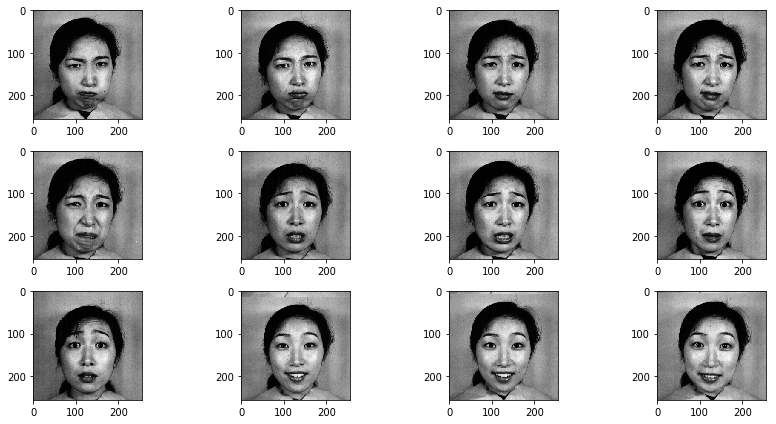

In [5]:
import seaborn as sns
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(x_train[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [58]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), input_shape=(256, 256, 1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3,3)))
model.add(Activation("sigmoid"))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3)))
model.add(Activation("sigmoid"))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [29]:
model_ann = Sequential()
model_ann.add(Dense(64, input_shape=(256,)))
model_ann.add(Activation('sigmoid'))
model_ann.add(BatchNormalization())

model_ann.add(Dense(32))
model_ann.add(Activation('sigmoid'))
model_ann.add(BatchNormalization())

model_ann.add(Dense(7))
model_ann.add(Activation('softmax'))

model_ann.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [34]:
epochs = 20

clf_ann = model_ann.fit(X_train, Y_train, validation_split=0.2)

ValueError: Error when checking input: expected dense_15_input to have 2 dimensions, but got array with shape (170, 256, 256)

In [59]:
# save best weights
#checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

# num epochs
epochs = 40

# run model
hist = model.fit(x_train, y_train, batch_size = 5, epochs=epochs, validation_split = 0.2, shuffle=True)
# save model to json
model_json = model.to_json()
with open("face_model.json", "w") as json_file:
    json_file.write(model_json)

Train on 136 samples, validate on 34 samples
Epoch 1/40
136/136 [==============================] - 6s 47ms/step - loss: 2.1849 - acc: 0.1250 - val_loss: 1.9667 - val_acc: 0.1176
Epoch 2/40
136/136 [==============================] - 4s 29ms/step - loss: 2.2039 - acc: 0.1691 - val_loss: 1.9256 - val_acc: 0.1765
Epoch 3/40
136/136 [==============================] - 4s 29ms/step - loss: 2.0254 - acc: 0.1397 - val_loss: 1.9682 - val_acc: 0.0882
Epoch 4/40
136/136 [==============================] - 4s 29ms/step - loss: 1.9779 - acc: 0.1912 - val_loss: 1.9175 - val_acc: 0.3235
Epoch 5/40
136/136 [==============================] - 4s 29ms/step - loss: 1.9473 - acc: 0.2132 - val_loss: 1.9237 - val_acc: 0.1765
Epoch 6/40
136/136 [==============================] - 4s 29ms/step - loss: 1.8426 - acc: 0.1985 - val_loss: 1.8852 - val_acc: 0.3529
Epoch 7/40
136/136 [==============================] - 4s 29ms/step - loss: 1.8687 - acc: 0.2721 - val_loss: 1.8728 - val_acc: 0.2941
Epoch 8/40
136/136 [====

In [ ]:
y_pred = model.predict(x_test)

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear',C = 1, gamma = 1)

In [18]:
for i in range(X_train.shape[0]):
    clf.fit(X_train[i], Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [256, 170]

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier('C:/Users/Anup/Desktop/Projects/Real-Time-Facial-Expression-Recognition-master/RealTimeFacialExpressionRecognition/haarcascade_frontalface_default.xml')
img = cv2.imread(0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transform image to gray scale
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
#print(faces)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('img',img)

In [ ]:
cap = cv2.VideoCapture(0)
 
while(True):
    ret, img = cap.read()
    
    #apply same face detection procedures
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        if cv2.waitKey(1) & 0xFF == ord('q'): #press q to quit
            break
        cv2.imshow('Facial', img)
    cap.release()
    cv2.destroyAllWindows()

    detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
    detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
    detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48

    from keras.models import model_from_json
    model = model_from_json(open("facial_expression_model_structure.json", "r").read())
    model.load_weights('facial_expression_model_weights.h5') #load weights
    
    img_pixels = image.img_to_array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
 
    img_pixels /= 255
 
    predictions = model.predict(img_pixels)
 
    #find max indexed array
    max_index = np.argmax(predictions[0])
 
    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    emotion = emotions[max_index]
 
    cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
